# Portfolio Optimization

## Background

Konno and Yamazaki (1990) proposed a linear programming model for portfolio optimization in which the risk measure is mean absolute deviation (MAD). This model computes a portfolio minimizing MAD subject to a lower bound on return.

In contrast to the classical Markowitz portfolio, the MAD criterion requires a data set consisting of returns on the investment assets. The data set may be an historical record or samples from a multivariate statistical model of portfolio returns.  The MAD criterion produces portfolios with properties not shared by the Markowitz portfolio, including second degree stochastic dominance.

The rest of the formulation is adapted from "Optimization Methods in Finance" by Gerald Curnuejols and Reha Tutuncu (2007) which, in turn, follows an implementation due to Fienstein and Thapa (1993).  

## Mean Absolute Deviation

Portfolio optimization refers to the allocation of investment capital among a set of financial assets to achieve a desired tradeoff between risk and return. The classical Markowitz approach to portfolio optimization measures risk using the expected variance of the portfolio return. The Markowitz approach results in a quadratic program for the relative weights of assets for the optimal portfolio. 

In 1991, Konno and Yamazaki <ref>{{Cite journal | last1 = Konno | first1 = Hiroshi | last2 = Yamazaki | first2 = Hiroaki | title = Mean-absolute deviation portfolio optimization model and its applications to Tokyo stock market | journal = Management Science | volume = 37 | pages = 519-531 | date = 1991}}</ref> proposed a linear programming model for portfolio optimization when risk is measured by the mean absolute deviation (MAD) from the expected return.  Using MAD as the risk metric produces portfolios with several desirable properties not shared by the Markowitz portfolio, including [[w:Stochastic_dominance|second order stochastic dominance]].

As originally formulated by Konno and Yamazaki, one starts with a history of returns $R_i(t_n)$ for every asset in a set $S$ of assets. The return at time $t_n$ is determined by the change in price of the asset, 

$$R_i(t_n)= {(P_i(t_n)-P_i(t_{n-1}))}/{P_i(t_{n-1})}$$

For each asset, the expected return is estimated by 

$$\bar{R}_i \approx \frac{1}{N}\sum_{n=1}^NR_i(t_n)$$

The investor specifies a minimum required return $R_{p}$.  The portfolio optimization problem is to determine the fraction of the total investment allocated to each asset, $w_i$,  that minimizes the mean absolution deviation from the mean

$$\min_{w_i} \frac{1}{N}\sum_{n=1}^N\lvert\sum_{i \in S} w_i(R_i(t_n)-\bar{R}_i)\rvert$$

subject to the required return and a fixed total investment:

$$
\begin{array}{rcl}
\sum_{i \in S} w_i\bar{R}_i & \geq & R_{p}  \\
\quad \\
\sum_{i \in S} w_i & = & 1
\end{array}
$$

The value of the minimum required return, $R_p$ expresses the investor's risk tolerance. A smaller value for $R_p$ increases the feasible solution space, resulting in portfolios with lower values of the MAD risk metric. Increasing $R_p$ results in portfolios with higher risk. The relationship between risk and return is a fundamental principle of investment theory. 

This formulation doesn't place individual bounds on the weights $w_i$. In particular, $w_i < 0$ corresponds to short selling of the associated asset.  Constraints can be added if the investor imposes limits on short-selling, on the maximum amount that can be invested in a single asset, or other requirements for portfolio diversification.  Depending on the set of available investment opportunities, additional constraints can lead to infeasible investment problems.

Investment portfolios are collections of investments that are managed for overall investment return.  Compared to investing all of your capital into a single asset, maintaining a portfolio of investments allows you to manage risk through diversification.

### Reduce Risk through Law of Large Numbers

Suppose there are a set of independent investment opportunities that will pay back between 0 and 300% of your original investment, and that all outcomes in that range are equally likely. You have $100,000 to invest.  If the pay is 0% then you lose all of your investment.

Should you put it all in one opportunity? Here we simulate the outcomes of 1000 trials where we place all the money into a sigle investment of $100,000.

Average Profit = $48662


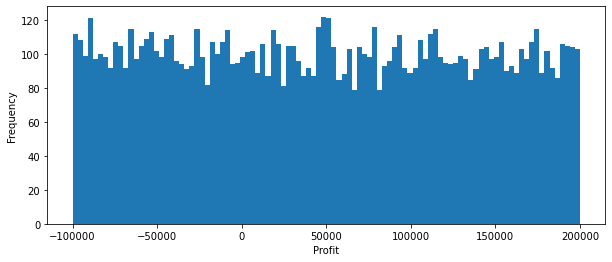

In [14]:
import matplotlib.pyplot as plt
import random
import numpy as np

w0 = 100000.00
n_trials = 10000

# create trials
profit = [w0 * random.uniform(0, 3.00) - w0 for n in range(n_trials)]

plt.figure(figsize=(10, 4))
plt.hist(profit, bins=100);
plt.xlabel('Profit')
plt.ylabel('Frequency')

print("Average Profit = ${:.0f}".format(np.mean(profit)))

The average profit is close to $50,000, or 50%, which would be very appealing to many investors. But, as you can see from the histogram of simulated results, about 1/3 of the time there is a loss, and about 2/3 of the time there is a profit. Is this a risk worth tanking for the chance of large investment outcome?

Let's see what happens if the $100,000 investment over a small number of equal sized investments.

Average Profit = $50177


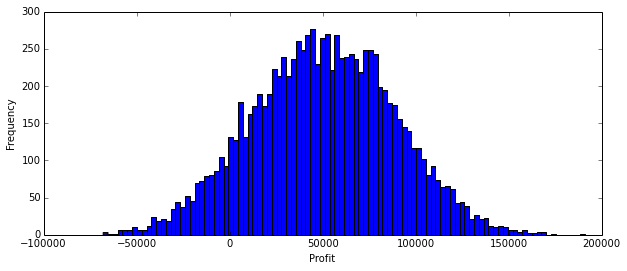

In [62]:
w0 = 100000.00
n_trials = 10000
n_investments = 5

Profit = list()
for n in range(0, n_trials):
     = sum([(W0/Ninvestments)*random.uniform(0,3.00) for _ in range(0,Ninvestments)])
    Profit.append(W1-W0)

figure(figsize=(10,4))
hist(Profit,bins=100);
xlim(-W0,2*W0)
xlabel('Profit')
ylabel('Frequency')

print "Average Profit = ${:.0f}".format(mean(Profit))

Even a modest degree of diversification reduces downside risk.

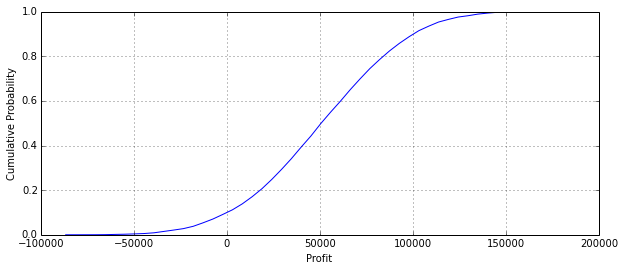

In [60]:
from statsmodels.distributions import ECDF

ecdf = ECDF(Profit)

x = linspace(min(Profit),max(Profit))

figure(figsize=(10,4))
plot(x,ecdf(x))
xlabel('Profit')
ylabel('Cumulative Probability')
grid();

## Download Historical Stock Price Data

!pip install pandas_datareader

In [220]:
import pandas as pd
import datetime
from pandas_datareader import data, wb, DataReader
import matplotlib.pyplot as plt

asset_symbols = ['AXP', 'AAPL', 'AMGN', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS', 'DOW', \
                 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', \
                 'MSFT', 'NKE', 'PG','TRV', 'UNH', 'V','VZ', 'WBA', 'WMT','XOM']

# historical period
end_date = datetime.datetime.today().date()
start_date = end_date - datetime.timedelta(3*365)

# get daily price data
assets = pd.DataFrame()
for s in asset_symbols:
    data = DataReader(s, "yahoo", start_date, end_date)
    print(f"{s}({len(data):d}), ", end="")
    assets[s] = data['Adj Close']

AXP(757), AAPL(757), AMGN(757), BA(757), CAT(757), CRM(757), CSCO(757), CVX(757), DIS(757), DOW(750), GS(757), HD(757), IBM(757), INTC(757), JNJ(757), JPM(757), KO(757), MCD(757), MMM(757), MRK(757), MSFT(757), NKE(757), PG(757), TRV(757), UNH(757), V(757), VZ(757), WBA(757), WMT(757), XOM(757), 

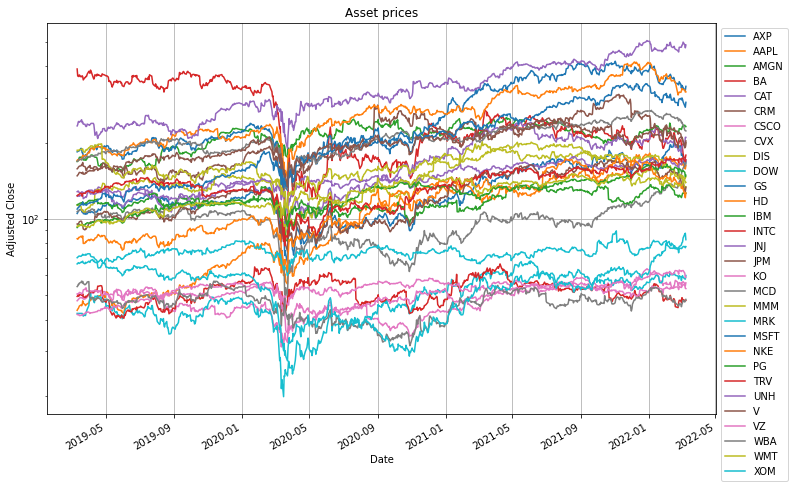

In [221]:
# fill missing data
assets.fillna(method="bfill", inplace=True)
assets.fillna(method="ffill", inplace=True)

# display a plot of the raw price data
assets.plot(logy=True, figsize=(12,8), ylabel="Adjusted Close", 
                 title = 'Asset prices', grid=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))

## Performance of an Equally Weighted Portfolio

The performance of an equally weighted portfolio will provide a standard for evaluating alternative investment strategies.

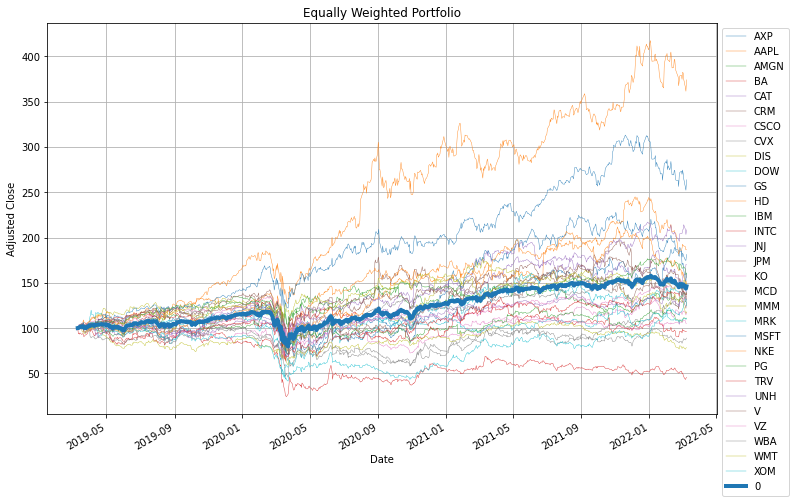

In [223]:
assets_scaled = 100.0*assets.div(asset_price.iloc[0])

n = len(portfolio)
equal_portfolio_weights = pd.DataFrame([1/n]*n, index=stock_price.columns)
equal_portfolio_value = assets_scaled.dot(equal_portfolio_weights)

ax = assets_scaled.plot(figsize=(12,8), ylabel="Adjusted Close", title = 'Gross Return for All Assets', grid=True, lw=0.4)
equal_portfolio_value.plot(lw=4, ax=ax, grid=True, title="Equally Weighted Portfolio")
plt.legend(bbox_to_anchor=(1.0, 1.0))


## Compute Component Returns

Arithmetic returns are required because subsequent calculations will be combining returns across components of a portfolio.

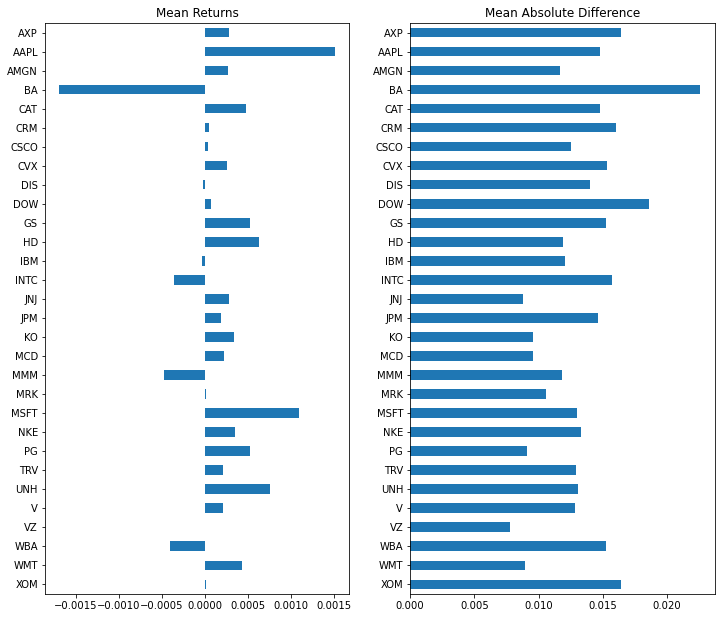

In [224]:
returns = assets.diff()[1:]/asset_price[1:]
returns_mean = returns.mean()
mad = abs(returns - returns_mean).mean()

fig, ax = plt.subplots(1, 2, figsize = (12, 0.35*len(returns.columns)))
returns_mean.plot(kind='barh', ax=ax[0], title="Mean Returns")
ax[0].invert_yaxis()
mad.plot(kind='barh', ax=ax[1], title='Mean Absolute Difference');
ax[1].invert_yaxis()

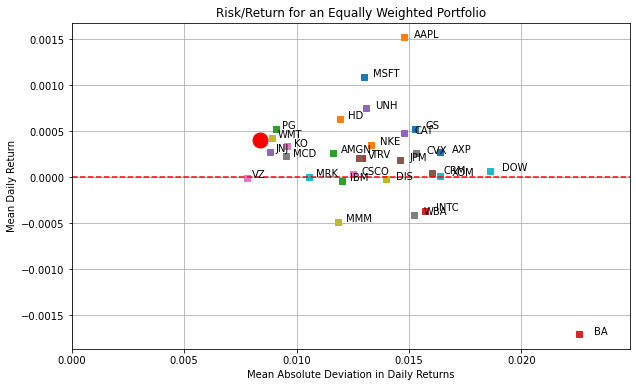

In [225]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
for s in assets.keys():
    ax.plot(mad[s], returns_mean[s],'s')
    ax.text(mad[s]*1.03, returns_mean[s],s)

ax.set_xlim(0, 1.1*max(mad))
ax.axhline(0, color='r', linestyle='--')

returns_equal = equal_portfolio_value.diff()[1:]/equal_portfolio_value[1:]
returns_equal_mean = returns_equal.mean()
mad_equal_mean = abs(returns_equal - returns_equal_mean).mean()

ax.plot(mad_equal_mean, returns_equal_mean, 'ro', ms=15)

ax.set_title('Risk/Return for an Equally Weighted Portfolio')
ax.set_xlabel('Mean Absolute Deviation in Daily Returns')
ax.set_ylabel('Mean Daily Return')
ax.grid(True)

## MAD Porfolio

The linear program is formulated and solved using Pyomo. 

In [302]:
import pyomo.environ as pyo

def mad_portfolio(assets):
    
    returns = assets.diff()[1:]/assets[1:]
    returns_mean = returns.mean()
    
    m = pyo.ConcreteModel()

    m.Rp = pyo.Param(mutable=True, default=0.0)

    m.INDEX = pyo.RangeSet(len(returns.index))
    m.ASSETS = pyo.Set(initialize=assets.keys())
    
    m.weight = pyo.Var(m.ASSETS)

    m.r_pos = pyo.Var(m.INDEX, m.ASSETS, domain=pyo.NonNegativeReals)
    m.r_neg = pyo.Var(m.INDEX, m.ASSETS, domain=pyo.NonNegativeReals)

    @m.Constraint()
    def sum_of_weights(m):
        return sum(m.weight[s] for s in m.ASSETS) == 1.0
    
    @m.Constraint(m.INDEX, m.ASSETS)
    def weighted_returns(m, i, s):
        date = returns.index[i-1]
        return m.r_pos[i, s] - m.r_neg[i, s] == m.weight[s] * (returns.loc[date, s] - returns_mean[s])

    @m.Objective(sense=pyo.minimize)
    def minimum_mad(m):
        return sum(sum(m.r_pos[i, s] + m.r_neg[i, s] for s in m.ASSETS) for i in m.INDEX)/len(m.INDEX)
    
    @m.Constraint()
    def minimum_return(m):
        return sum(m.weight[s] * returns_mean[s] for s in m.ASSETS) >= m.Rp
    
    return m


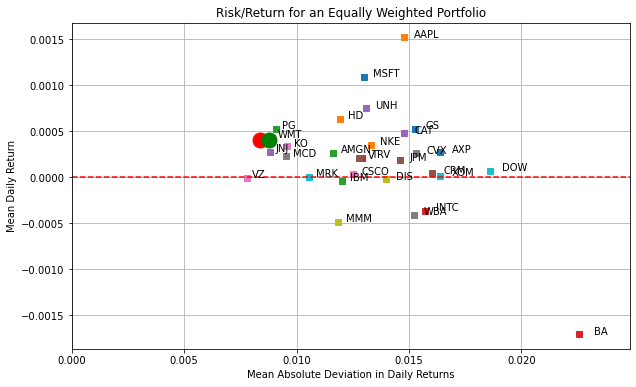

In [303]:
m = mad_portfolio(assets)
m.Rp = 0.0004
pyo.SolverFactory('cbc').solve(m)

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for s in assets.keys():
    ax.plot(mad[s], returns_mean[s],'s')
    ax.text(mad[s]*1.03, returns_mean[s],s)

ax.set_xlim(0, 1.1*max(mad))
ax.axhline(0, color='r', linestyle='--')

returns_equal = equal_portfolio_value.diff()[1:]/equal_portfolio_value[1:]
returns_equal_mean = returns_equal.mean()
mad_equal_mean = abs(returns_equal - returns_equal_mean).mean()

ax.plot(mad_equal_mean, returns_equal_mean, 'ro', ms=15)
ax.plot(m.minimum_mad(), m.Rp(), 'go', ms=15)

ax.set_title('Risk/Return for an Equally Weighted Portfolio')
ax.set_xlabel('Mean Absolute Deviation in Daily Returns')
ax.set_ylabel('Mean Daily Return')
ax.grid(True)

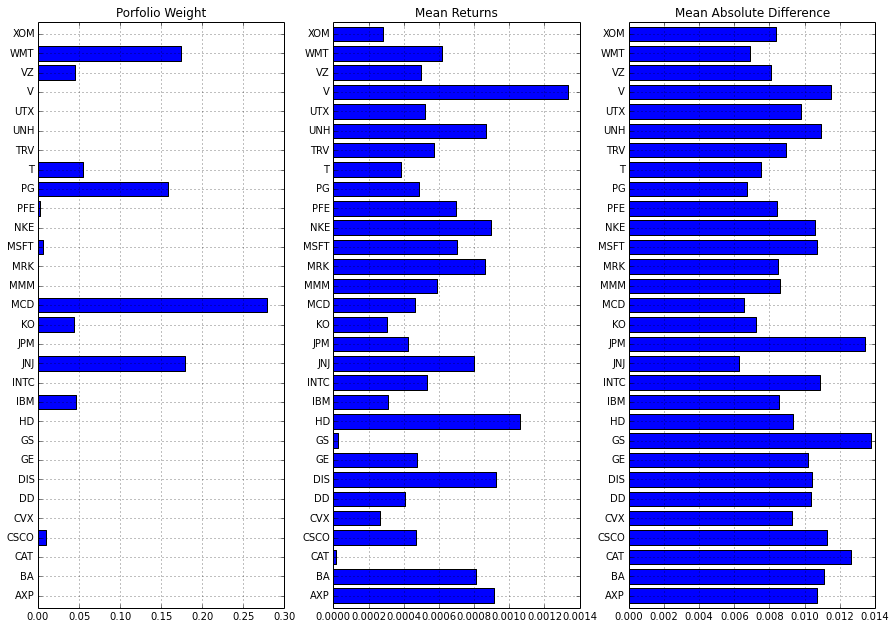

In [194]:
figure(figsize = (15,0.35*len(returns.columns)))

ws = pd.Series({s: w[s].varValue for s in portfolio},index=portfolio)

subplot(1,3,1)
ws.plot(kind='barh')
title('Porfolio Weight');

subplot(1,3,2)
returns.mean().plot(kind='barh')
title('Mean Returns');

subplot(1,3,3)
abs(returns-returns.mean()).mean().plot(kind='barh')
title('Mean Absolute Difference');

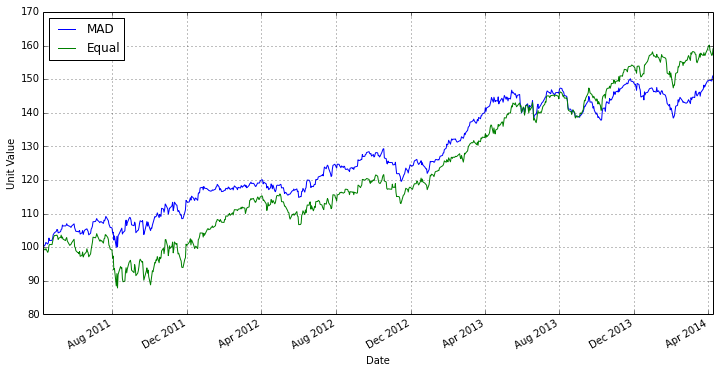

In [195]:
P_mad = pd.Series(0,index=adjclose.index)
for s in portfolio:
    P_mad += 100.0*ws[s]*adjclose[s]/adjclose[s][0]
    
figure(figsize=(12,6))
P_mad.plot()
P_equal.plot()
legend(['MAD','Equal'],loc='best')
ylabel('Unit Value')

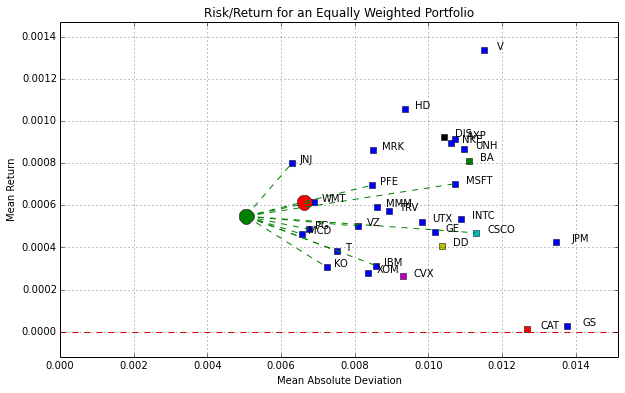

In [196]:
figure(figsize=(10,6))
for s in portfolio:
    plot(mad[s],rmean[s],'s')
    text(mad[s]*1.03,rmean[s],s)
    
axis([0, 1.1*max(mad), min([0,min(rmean)-.1*(max(rmean)-min(rmean))]), 1.1*max(rmean)])
ax = axis()
plot([ax[0],ax[1]],[0,0],'r--');

#R_equal = P_equal.diff()[1:]/P_equal[1:]
R_equal = log(P_equal/P_equal.shift(+1))
M_equal = abs(R_equal-R_equal.mean()).mean()

plot(M_equal,R_equal.mean(),'ro',ms=15)

#R_mad = P_mad.diff()[1:]/P_mad[1:]
R_mad = log(P_mad/P_mad.shift(+1))
M_mad = abs(R_mad-R_mad.mean()).mean()

for s in portfolio:
    if ws[s] >= 0.0001:
        plot([M_mad,mad[s]],[R_mad.mean(),rmean[s]],'g--')

plot(M_mad,R_mad.mean(),'go',ms=15)

title('Risk/Return for an Equally Weighted Portfolio')
xlabel('Mean Absolute Deviation')
ylabel('Mean Return')

grid();